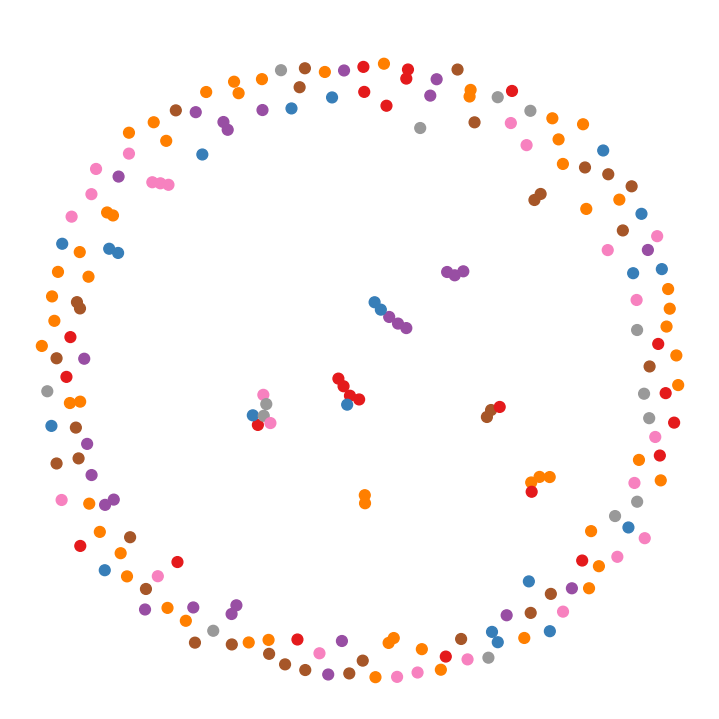

In [5]:
import torch
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import subgraph

dataset = Planetoid(root="data/Cora", name="Cora")
data = dataset[0]

# ランダム200ノード
n = 200
perm = torch.randperm(data.num_nodes)
subset = perm[:n]

edge_index_sub, _ = subgraph(subset, data.edge_index, relabel_nodes=True)
y_sub = data.y[subset]                     # (n,)
node_colors = y_sub.cpu().numpy()          # 長さ n

# ★ここが重要：ノードを先に全部追加（孤立ノードも含める）
G = nx.Graph()
G.add_nodes_from(range(n))
G.add_edges_from(edge_index_sub.t().tolist())

# エッジ色：同クラス=青、異クラス=赤
edge_colors = [
    "blue" if node_colors[u] == node_colors[v] else "red"
    for u, v in G.edges()
]

plt.figure(figsize=(7, 7))
pos = nx.spring_layout(G, seed=0)

nx.draw(
    G, pos,
    node_color=node_colors, cmap=plt.cm.Set1,
    node_size=60,
    edge_color=edge_colors, width=0.8
)
plt.show()
